<a href="https://colab.research.google.com/github/suryanshgupta-creator/projects/blob/main/Sentiment_Analysis_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dependencies

In [1]:
# Loading Data Wrangling Libraries
import numpy as np
import pandas as pd

# Load Dataset and Check Data Quality

In [2]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care_5.json.gz
# Loading the Amazon Reviews Dataset
file = pd.read_json('reviews_Health_and_Personal_Care_5.json.gz', lines=True)

--2025-10-26 17:32:56--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Health_and_Personal_Care_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85180885 (81M) [application/x-gzip]
Saving to: ‘reviews_Health_and_Personal_Care_5.json.gz’

reviews_Health_and_ 100%[===================>]  81.23M  51.3MB/s    in 1.6s    

2025-10-26 17:32:58 (51.3 MB/s) - ‘reviews_Health_and_Personal_Care_5.json.gz’ saved [85180885/85180885]



In [3]:
file.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,1313452800,"08 16, 2011"


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346355 entries, 0 to 346354
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      346355 non-null  object
 1   asin            346355 non-null  object
 2   reviewerName    343304 non-null  object
 3   helpful         346355 non-null  object
 4   reviewText      346355 non-null  object
 5   overall         346355 non-null  int64 
 6   summary         346355 non-null  object
 7   unixReviewTime  346355 non-null  int64 
 8   reviewTime      346355 non-null  object
dtypes: int64(2), object(7)
memory usage: 23.8+ MB


In [5]:
file.shape

(346355, 9)

In [6]:
# Display sample rows from the reviewText column
file[['reviewText']]

,reviewText
0,This is a great little gadget to have around. ...
1,I would recommend this for a travel magnifier ...
2,What I liked was the quality of the lens and t...
3,Love the Great point light pocket magnifier! ...
4,This is very nice. You pull out on the magnifi...
...,...
346350,My appetite is definitely suppressed - my ener...
346351,I was drawn to this particular brand because o...
346352,"Great Product, Gave extra energy without the j..."
346353,I get lots of energy from this product. I felt...


In [7]:
# Display sample rows from the summary column
file[['summary']]

,summary
0,Handy little gadget
1,Small & may need to encourage battery
2,Very good but not great
3,great addition to your purse
4,Very nice and convenient.
...,...
346350,Great ingredients!
346351,Great!
346352,Energy minus the jitters
346353,I get lots of energy from this product.


We see that the `reviexText` column has a much more detailed review of the products. So we will choose this column for our sentiment analysis purposes to get a more reliable result.

Let us take a subset of the data columns, as we do not need all the features for our sentiment analysis purpose

In [8]:
# Take only the reviews and the ratings
reviews_full = file[['reviewText', 'overall']]

In [9]:
# Create the Target Column with value of 0(Positive Review) and 1(Negative Review)
# We are assigning 1 value to Negative Review as generally 1 is the class we are trying to detect.
conditions = [(reviews_full['overall'] <= 3), (reviews_full['overall'] > 3)]
values = [1, 0]
reviews_full['y'] = np.select(conditions, values)

/tmp/ipython-input-1316506857.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_full['y'] = np.select(conditions, values)


### Check a sample of Positive Reviews

In [10]:
# Check out some Positive Reviews
pd.set_option('display.max_colwidth', None)
reviews_full[reviews_full['y']==0]

,reviewText,overall,y
0,"This is a great little gadget to have around. We've already used it to look for splinters and a few other uses. The light is great. It's a handy size. However, I do wish I'd bought one with a little higher magnification.",5,0
1,"I would recommend this for a travel magnifier for the occasional reading.I had read on another review about a magnifier having a problem with the light coming on. I did find that this one appeared to be DOA out of the box. But, after opening & shutting the viewer to turn on & off the light, the light began to come on. After several times of doing this, the light appears to be coming on all the time.It is small, but for taking it someplace & reading things like a menu in a dark corner of a restaurant, this is great.",4,0
2,"What I liked was the quality of the lens and the built in light. Then lens had no discernable distortion anywhere. It magnified everything evenly without the ripples and distortion that I've seen with other low cost magnifiers. This light is a nice touch and easy to use. If you want it on just pull the lens out a bit. It is focused very close to the center of what you will be look at and provides nice, even coverage.What I didn't like was the brightness (actually dimmness) of the light and where it is focused. LEDs can be lots brighter, I know as I've seen them. Also, the light focuses at the center of you field of view but only when the lens is too close to be focused properly.Bottom line is this is a good value for a magnifier and could have been made great with better quality control.BTW, I feel that honest, effective reviews can take the place of first-hand experiences that are lacking in online shopping. I've always appreciated the help I've received from other reviewers and work hard to return the favor as best as I can. I hope you found this review helpful and if there was anything you thought was lacking or unclear leave a comment and I'll do what I can to fix it.",4,0
3,"Love the Great point light pocket magnifier! works great, especially if you forget your glasses and can't read the menu when you are out for dinner.... the light is a bonus in a dark restaurant, too. I would have given 5 stars if it came with a case that covers the glass. The clear plastic case it comes in is a little tacky and I'd be willing to pay a little more for a nice case to protec the lens.",4,0
4,"This is very nice. You pull out on the magnifier when you want the light to come on, then slide it back in. I would recommend buying this if you need something with a light that you can easily put in your pocket or purse.",5,0
...,...,...,...
346350,My appetite is definitely suppressed - my energy level is much better than it used to be and I am no longer reaching for more coffee in the afternoons - very happy with this supplement and it's additional powerful ingredients. PLUS -- they smell delicious :),5,0
346351,I was drawn to this particular brand because of all the natural and super healthy ingredients it has. Also the price was very reasonable. I am looking forward to seeing great results from this product!,5,0
346352,"Great Product, Gave extra energy without the jitters, still need to take a lilttle longer to see weight loss results but so far it's great,thanks!",5,0
346353,I get lots of energy from this product. I felt sluggish and slow in the morning before but now since taking this product I have lots more energy. Thanks again for a great product TLC Brands.,5,0


### Check a sample of Negative Reviews

In [11]:
# Check out some Negative Reviews
reviews_full[reviews_full['y']==1]

,reviewText,overall,y
8,"The screen of the magnifier is small. If you're looking to read text this is not going to work. Though I have not attempted to replace the battery, battery container seems to be contained by a very small screw-A Phillips screwdriver-of which would have to be incredibly small. I dread having to replace his battery.",3,1
17,"This magnifier has nothing to cover it when not in use.I compared it with a Carson 3x magnifier and this one did not seem as clear as the Carson - hard to see the furigana clearly in Japanese comic books with this one.The Carson ones come with a cover.I would recommend the Carson 5x if you are looking for good size enlarging.Carson MiniBrite 5x Power Slide- Out MagnifierI wish I had skipped the 3x and gone with the 5x only.For this one in the 3x, the light works well and lights things up nicely.Carson MiniBrite 5x Power Slide- Out Magnifier",3,1
26,"I recently saw this at a local AC Moore store. They had one open so you could try it out. I only tried it for less than 10 minutes but that was enough. Personally I think this is one of the worst ideas I have seen in a long time that is a product of one of those annoying TV commercials. The idea of it is that it supposed to be easier to hold this thing over your book and hover it there continuously while you read, as opposed to just wearing glasses, ....Or something. (I think a newer model I saw on TV recently has a light, but that doesn't come off as any improvement on it in my opinion). No question that if you get this thing just right it can magnify the page of your book or whatever it is you are using it for, but the fact that it actually works is where the benefits of this thing ends. For starters, even if you are not reading one of the books that requires two hands for it closes on you the second you relax your grip on it,(as most of them are), this thing has to be positioned just right all the time in order to magnify the page successfully. Move it back and forth just a little and your page becomes a blur. There are no attachments to this thing, your hand is the tool, and in no time you start to have it get tired, go to sleep, etc. There is not even a handle anywhere on this thing. You just hold it someplace along the edge where you can sometimes find yourself magnifying nothing but your own finger. Lastly, this thing is not glare resistant. Depending on your light source, you will occasionally have to move or adjust it just to see. Or better yet, forget about it it all together which is what I suggest overall. There are several of these page magnifiers available here on Amazon. The cheaper ones are much smaller. Actually, I think a smaller ones is a wiser investment than this more expensive full page model. The smaller one can be a handy tool to have around when you are trying to read that horrible tiny print on such things as medicine bottles, instructions, etc. And its much cheaper than this model. No matter what you have in mind for this Mighty Bright, I suggest you move on. My experience with it was that is nothing but aggravating, poorly designed, and a waste of money...",1,1
27,"Less helpful than a good magnifying glass. Just a waste of money. If you have vision problems, don't fall for any of these gadgets. Buy a good magnifying glass instead. It might cost a little more but will be well worth it.",2,1
29,"This magnifies modestly well, is lightweight, and magnifies only at a certain distance from the page. Barely worth the price.",3,1
...,...,...,...
346301,I have never found a product that worked tooooooo good. I keep forgetting to eat anything when I am taking this product as designed. I mean if I eat a bagel in the morning I feel like I am so full that I ate a bunch of food. If you buy this I would recommend you set a timer to remember to eat. It really does work almost too good.,3,1
346303,I love that the product works but I do not have a lot of weight that I need to get rid of. I was looking for something that would wo

# Preprocessing Steps and Modeling

Following are the steps we take to create and evaluate our own sentiment analysis models.

- Firstly, we need to perform **preprocessing** on the raw text data. This involves some of the following steps
- **Tokenize text**
- **Remove Stop Words and Punctuation**
- **Lowercasing** the tokenized text
- **Vectorize** the documents (each review) using 3 approaches : **Bag of Words, TF-IDF and TF-IDF with N-grams.**
- Choose one of the vectorized sets from above.
- **Split** the data into **Training and Test sets.**
- Train 3 Classification Models from scratch - **SVM, Logistic Regression and a Perceptron**
- **Evaluate Model Performance** of each of these models on Out of sample data i.e. the Test Set
- Do **Hyperparameter Tuning**
- **Pre-Trained Models.**Additionally check if larger Pre-Trained Models perform better than our models trained on this corpus


## Preprocessing

Preprocessing items like tokenization, lowercasing, stop word removal are already taken care of by the Vectorizer modules in scikit learn. So we will focus on usage of different Vectorization techniques and their output.

## Bag of Words

In [12]:
# Use Scikit Learn Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

message_list = reviews_full['reviewText']
vectorizer1 = CountVectorizer(stop_words='english', max_features = 1000)
doc_term_matrix1 = vectorizer1.fit_transform(message_list)
BOW_df = pd.DataFrame(doc_term_matrix1.toarray(), columns = vectorizer1.get_feature_names_out())

In [13]:
# Print the vocabulary of top 1000 most relevant words
print(vectorizer1.vocabulary_)

{'great': np.int64(367), 'little': np.int64(488), 've': np.int64(948), 'used': np.int64(937), 'look': np.int64(496), 'uses': np.int64(940), 'light': np.int64(477), 'handy': np.int64(380), 'size': np.int64(780), 'wish': np.int64(981), 'bought': np.int64(94), 'higher': np.int64(400), 'recommend': np.int64(710), 'travel': np.int64(909), 'reading': np.int64(700), 'read': np.int64(699), 'review': np.int64(729), 'having': np.int64(385), 'problem': np.int64(669), 'coming': np.int64(172), 'did': np.int64(223), 'box': np.int64(96), 'turn': np.int64(923), 'began': np.int64(75), 'come': np.int64(169), 'times': np.int64(890), 'doing': np.int64(238), 'time': np.int64(889), 'small': np.int64(786), 'taking': np.int64(866), 'things': np.int64(881), 'like': np.int64(479), 'dark': np.int64(206), 'liked': np.int64(480), 'quality': np.int64(690), 'seen': np.int64(752), 'low': np.int64(510), 'cost': np.int64(190), 'nice': np.int64(575), 'touch': np.int64(904), 'easy': np.int64(257), 'use': np.int64(936), '

In [14]:
# Print a snapshot of the Vectorized output in a dataframe using Bag of Words Approach
BOW_df.head(10)

,10,100,1000,12,15,16,20,24,25,30,...,worry,worse,worth,wouldn,wrap,wrist,wrong,year,years,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
print(BOW_df.iloc[0][BOW_df.iloc[0] != 0])

bought    1
great     2
handy     1
higher    1
light     1
little    2
look      1
size      1
used      1
uses      1
ve        1
wish      1
Name: 0, dtype: int64


## TF-Idf

TF-IDF will ensure that some all words are given their respective weights in terms of relevance. Some reviews may be very large while other reviews may be small. TF-IDF allows to give higher weightage to words which occur with a high term frequency (more number of times in document) and less Document Frequency (Inverse Document Frequency ensures that more commonly used words that do not carry a lot of relevant signals are weighted low)

In [16]:
# Use Scikit Learn TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
message_list = reviews_full['reviewText']
vectorizer2 = TfidfVectorizer(stop_words='english', max_features = 1000)
doc_term_matrix2 = vectorizer2.fit_transform(message_list)
TfIdf_df = pd.DataFrame(doc_term_matrix2.toarray(), columns = vectorizer2.get_feature_names_out())

In [17]:
# Display top 1000 words by TF-IDF
vectorizer2.get_feature_names_out()

array(['10', '100', '1000', '12', '15', '16', '20', '24', '25', '30',
       '34', '40', '50', '60', '8217', 'able', 'absolutely', 'accurate',
       'acid', 'active', 'actual', 'actually', 'add', 'added', 'adding',
       'addition', 'additional', 'advertised', 'aftertaste', 'age', 'ago',
       'aid', 'air', 'alcohol', 'allergies', 'allergy', 'allows',
       'alternative', 'amazing', 'amazon', 'anti', 'anymore', 'apart',
       'appetite', 'applied', 'apply', 'area', 'areas', 'aren', 'arm',
       'arrived', 'arthritis', 'artificial', 'asleep', 'available',
       'average', 'avoid', 'away', 'awesome', 'baby', 'bad', 'bag',
       'bags', 'balm', 'bar', 'bars', 'base', 'based', 'basically',
       'bathroom', 'batteries', 'battery', 'beard', 'beat', 'bed',
       'began', 'believe', 'benefit', 'benefits', 'best', 'better', 'big',
       'bigger', 'bit', 'black', 'blade', 'blades', 'blend', 'blood',
       'blue', 'body', 'boost', 'bottle', 'bottles', 'bought', 'bowl',
       'box', 

In [18]:
# Display Vectorized Output
TfIdf_df.head()

,10,100,1000,12,15,16,20,24,25,30,...,worry,worse,worth,wouldn,wrap,wrist,wrong,year,years,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## N-grams

N-grams can be used with either the Bag of Words approach or with the TF-IDF approach. The idea is that either of previous approaches do not account for the ordering of the words which may alter meaning. Taking consecutive chunks of words (of say 2-gram or 3-gram) might be useful.        
Here, for our purposes we only consider 1-gram and 2-grams (using the TF-IDF approach) and see if an appreciable number of 2-grams show up on the top 1000 phrases.

In [19]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#message_list = reviews_full['reviewText']
#vectorizer3 = TfidfVectorizer(stop_words='english', max_features = 1000, ngram_range=(1))
#doc_term_matrix3 = vectorizer3.fit_transform(message_list)
#TfIdf_df1 = pd.DataFrame(doc_term_matrix3.toarray(), columns = vectorizer3.get_feature_names_out())

In [20]:
# Display top 1000 1-gram and 2-grams
vectorizer2.get_feature_names_out()

array(['10', '100', '1000', '12', '15', '16', '20', '24', '25', '30',
       '34', '40', '50', '60', '8217', 'able', 'absolutely', 'accurate',
       'acid', 'active', 'actual', 'actually', 'add', 'added', 'adding',
       'addition', 'additional', 'advertised', 'aftertaste', 'age', 'ago',
       'aid', 'air', 'alcohol', 'allergies', 'allergy', 'allows',
       'alternative', 'amazing', 'amazon', 'anti', 'anymore', 'apart',
       'appetite', 'applied', 'apply', 'area', 'areas', 'aren', 'arm',
       'arrived', 'arthritis', 'artificial', 'asleep', 'available',
       'average', 'avoid', 'away', 'awesome', 'baby', 'bad', 'bag',
       'bags', 'balm', 'bar', 'bars', 'base', 'based', 'basically',
       'bathroom', 'batteries', 'battery', 'beard', 'beat', 'bed',
       'began', 'believe', 'benefit', 'benefits', 'best', 'better', 'big',
       'bigger', 'bit', 'black', 'blade', 'blades', 'blend', 'blood',
       'blue', 'body', 'boost', 'bottle', 'bottles', 'bought', 'bowl',
       'box', 

In [21]:
# Display the vectorized format representation of n-gram TF-IDF
#TfIdf_df1.head(10)

# Split into Training and Test Sets

Based on the above three vectorization approaches we select the 1-gram TF-IDF approach as there were very few number of 2-grams in the top 1000 phrases.

Then we split the dataset into 80% training records and 20% test records

In [22]:
# Derive the Feature Matrix and Target Vector
X = TfIdf_df
y = reviews_full['y']

In [23]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [24]:
X_train.shape

(277084, 1000)

We can see that there are about 277K reviews in our Training set which should be good enough for training purposes.

# Logistic Regression Classification Model

Using `SGDClassifier` from `sklearn` with `loss=log` allows us to run Logistic Regression classifier on the dataset.

In [25]:
# Import SGDClassifier
from sklearn.linear_model import SGDClassifier

# Logistic Regression Classification Model
clf2 = SGDClassifier(loss='log_loss', # Changed 'log' to 'log_loss'
              alpha=1e-3, random_state=42,
                      max_iter=5, tol=None)
clf2 = clf2.fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)

In [26]:
y_pred2 = clf2.predict(X_test)

In [27]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# Check accuracy
np.mean(y_pred2 == y_test)

np.float64(0.8096028641134096)

In [29]:
# Import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     55972
           1       0.94      0.01      0.02     13299

    accuracy                           0.81     69271
   macro avg       0.88      0.50      0.46     69271
weighted avg       0.84      0.81      0.73     69271



**Observations:**       
- The accuracy of the model is around 81%. However, we notice that the recall score of the model is very low.
- This is because the dataset is an **imbalanced dataset** with less number of bad reviews.
- F1 Score, Precision, Recall of each of the classes is also shown above.

# Perceptron Classification Model

Using `SGDClassifier` from `sklearn` with `loss=perceptron` allows us to run Perceptron algorithm on the dataset.

In [30]:
clf3 = SGDClassifier(loss='perceptron',
              alpha=1e-3, random_state=42,
                      max_iter=5, tol=None)
clf3 = clf3.fit(X_train, y_train)

In [31]:
y_pred3 = clf3.predict(X_test)

In [32]:
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
np.sum(y_pred3)

np.int64(10993)

In [34]:
np.mean(y_pred3 == y_test)

np.float64(0.8149875128119992)

## Full Classfication Report for Perceptron (Accuracy, Recall, Precision, F1 Score)

In [35]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     55972
           1       0.52      0.43      0.47     13299

    accuracy                           0.81     69271
   macro avg       0.70      0.67      0.68     69271
weighted avg       0.80      0.81      0.81     69271



We see that the Perceptron performed much better than simpler models in terms of predicting the positive class (i.e. the bad reviews). Let us compute additional performance measures for this model.

## Confusion Matrix for the Perceptron

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred3)

array([[50717,  5255],
       [ 7561,  5738]])

## ROC AUC Score for the Perceptron

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf3.decision_function(X_test))

np.float64(0.7889579826919464)

## ROC Curve

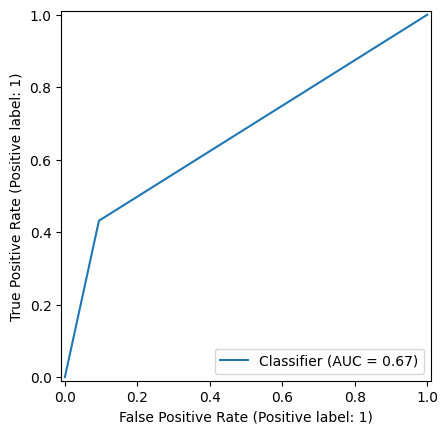

In [38]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred3)